In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
start = '2010-06-29'
end = '2022-03-24'

data = pd.read_csv(r"/content/TSLA.csv")
df = pd.DataFrame(data)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [ ]:
df = df.drop (['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,3.800,5.000,3.508,4.778,93831500
1,5.158,6.084,4.660,4.766,85935500
2,5.000,5.184,4.054,4.392,41094000
3,4.600,4.620,3.742,3.840,25699000
4,4.000,4.000,3.166,3.222,34334500


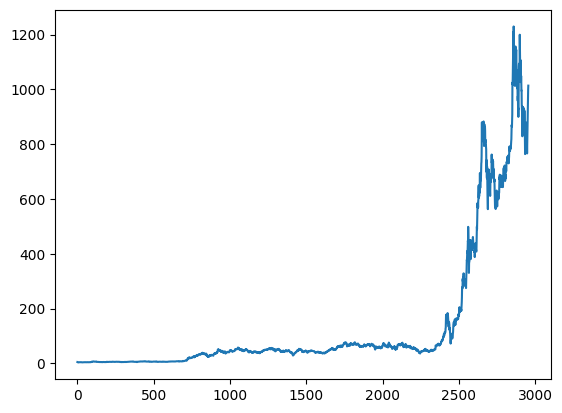

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2951    988.279197
2952    987.306497
2953    986.867697
2954    986.088396
2955    985.087596
Name: Close, Length: 2956, dtype: float64

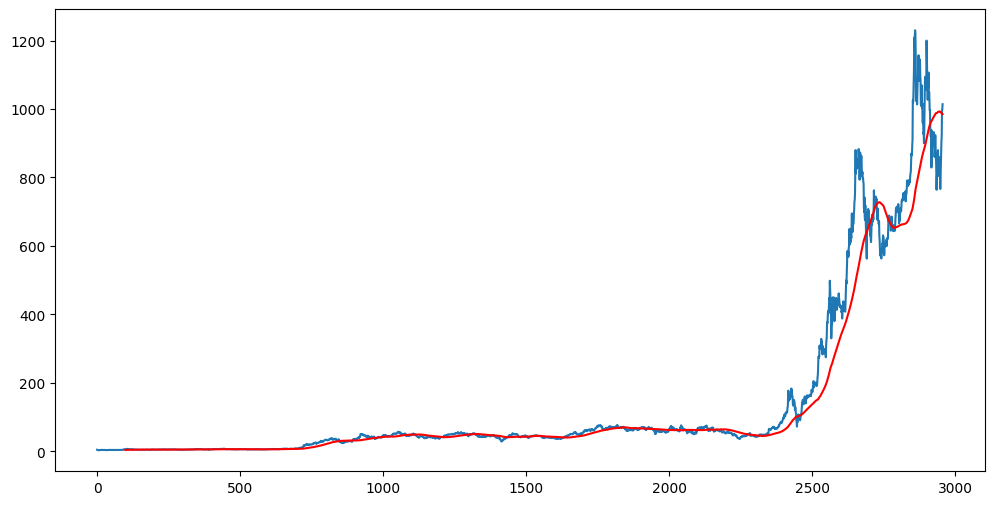

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2951    851.032347
2952    852.642897
2953    854.587147
2954    856.564747
2955    858.640447
Name: Close, Length: 2956, dtype: float64

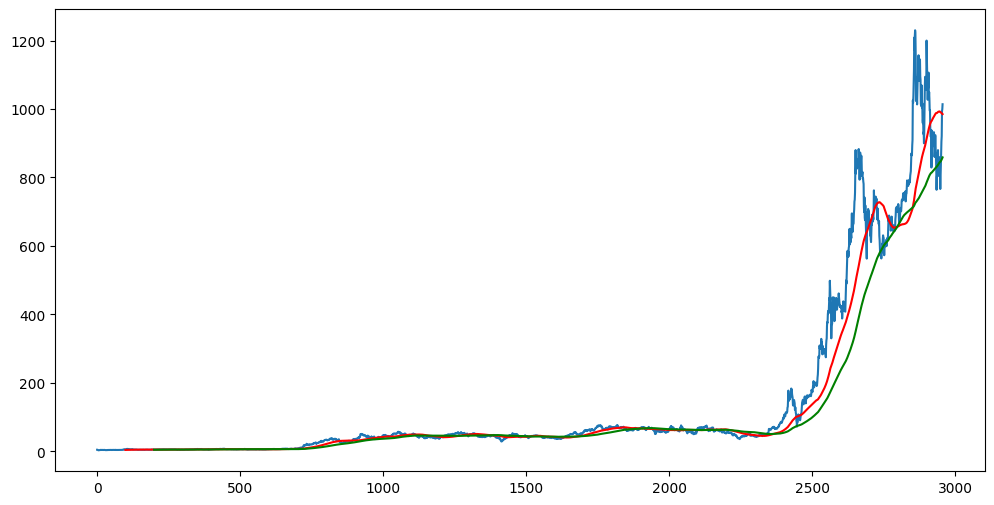

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2956, 5)

In [ ]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df*0.70))])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2956, 1)
(887, 1)


In [ ]:
data_training.head()

,Close
0,4.778
1,4.766
2,4.392
3,3.840
4,3.222


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
#ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))




model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))




model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
90/90 [==============================] - 30s 257ms/step - loss: 0.0112
Epoch 2/50
90/90 [==============================] - 24s 260ms/step - loss: 0.0032
Epoch 3/50
90/90 [==============================] - 24s 269ms/step - loss: 0.0033
Epoch 4/50
90/90 [==============================] - 24s 272ms/step - loss: 0.0027
Epoch 5/50
90/90 [==============================] - 25s 273ms/step - loss: 0.0031
Epoch 6/50
90/90 [==============================] - 24s 268ms/step - loss: 0.0025
Epoch 7/50
90/90 [==============================] - 24s 268ms/step - loss: 0.0024
Epoch 8/50
90/90 [==============================] - 24s 270ms/step - loss: 0.0020
Epoch 9/50
90/90 [==============================] - 24s 272ms/step - loss: 0.0023
Epoch 10/50
90/90 [==============================] - 24s 272ms/step - loss: 0.0022
Epoch 11/50
90/90 [==============================] - 25s 282ms/step - loss: 0.0024
Epoch 12/50
90/90 [==============================] - 24s 267ms/step - loss: 0.0019
Epoch 13/50
9

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
2069,58.967999
2070,56.992001
2071,59.804001
2072,59.666000
2073,59.820000


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-25-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [ ]:
final_df.head()

,Close
0,1208.589966
1,1172.000000
2,1213.859985
3,1229.910034
4,1222.089966


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.98214573],
       [0.95150385],
       [0.98655905],
       [1.        ],
       [0.99345117],
       [0.9439166 ],
       [0.82714407],
       [0.86436822],
       [0.86065004],
       [0.83545151],
       [0.81867757],
       [0.85329729],
       [0.88200475],
       [0.88817667],
       [0.92224376],
       [0.93883338],
       [0.8987703 ],
       [0.90460723],
       [0.87606733],
       [0.92218508],
       [0.928692  ],
       [0.887021  ],
       [0.87831161],
       [0.82000069],
       [0.81500958],
       [0.85080174],
       [0.86521404],
       [0.8106465 ],
       [0.82172586],
       [0.77933463],
       [0.77271888],
       [0.78735731],
       [0.74626415],
       [0.7509957 ],
       [0.72367004],
       [0.75598686],
       [0.81489233],
       [0.86357269],
       [0.88613327],
       [0.8815525 ],
       [0.87964311],
       [0.86636971],
       [0.85501409],
       [0.97476794],
       [0.9327368 ],
       [0.88125941],
       [0.86164654],
       [0.830

In [ ]:
input_data.shape

(987, 1)

In [ ]:
x_test = []
y_test = []


for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(887, 100, 1)
(887,)


In [ ]:
#Making predictions

y_predicted = model.predict(x_test)

28/28 [==============================] - 3s 74ms/step


In [ ]:
y_predicted.shape

(887, 1)

In [ ]:
y_test

array([0.01940682, 0.01775205, 0.02010693, 0.01999136, 0.02012032,
       0.02021747, 0.02043688, 0.0218756 , 0.02153057, 0.01437046,
       0.02206318, 0.0204419 , 0.01940012, 0.01722781, 0.01389815,
       0.01199046, 0.01404051, 0.01304898, 0.01227016, 0.01336721,
       0.01350288, 0.01635017, 0.01554455, 0.01422642, 0.01357155,
       0.01373066, 0.01928958, 0.01834495, 0.02275993, 0.02544644,
       0.02610802, 0.02527895, 0.02652171, 0.02768743, 0.02804417,
       0.02720506, 0.02714811, 0.02833728, 0.02887994, 0.02873087,
       0.02551008, 0.02675787, 0.02764053, 0.02838418, 0.02936733,
       0.02922664, 0.02822506, 0.02666743, 0.02459728, 0.0279755 ,
       0.02762713, 0.02828871, 0.02716654, 0.02872585, 0.03006743,
       0.03027009, 0.03083285, 0.02998034, 0.0311829 , 0.03145255,
       0.03142576, 0.03313246, 0.03127669, 0.02838083, 0.02647314,
       0.02579314, 0.02284703, 0.0235823 , 0.01949894, 0.02464082,
       0.02297264, 0.02594388, 0.02576466, 0.02196604, 0.02033

In [ ]:
y_predicted

array([[0.7125834 ],
       [0.7129103 ],
       [0.6956055 ],
       [0.6660807 ],
       [0.62989485],
       [0.5907837 ],
       [0.5512041 ],
       [0.5125939 ],
       [0.4759688 ],
       [0.4413722 ],
       [0.40857008],
       [0.3761508 ],
       [0.34308285],
       [0.30925417],
       [0.27454734],
       [0.23854391],
       [0.2019282 ],
       [0.1702806 ],
       [0.14548406],
       [0.12552515],
       [0.10845931],
       [0.09351302],
       [0.08078275],
       [0.07029336],
       [0.06185359],
       [0.0551655 ],
       [0.04990863],
       [0.04579407],
       [0.04257499],
       [0.04005606],
       [0.0380882 ],
       [0.03655761],
       [0.03537524],
       [0.03447228],
       [0.03379616],
       [0.03330585],
       [0.03296714],
       [0.03275102],
       [0.03262659],
       [0.03257578],
       [0.03258599],
       [0.03264321],
       [0.03273451],
       [0.03284983],
       [0.03298207],
       [0.03312709],
       [0.03328226],
       [0.033

In [ ]:
scaler.scale_

array([0.00083744])

In [ ]:
scale_factor = 1/0.00083744
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

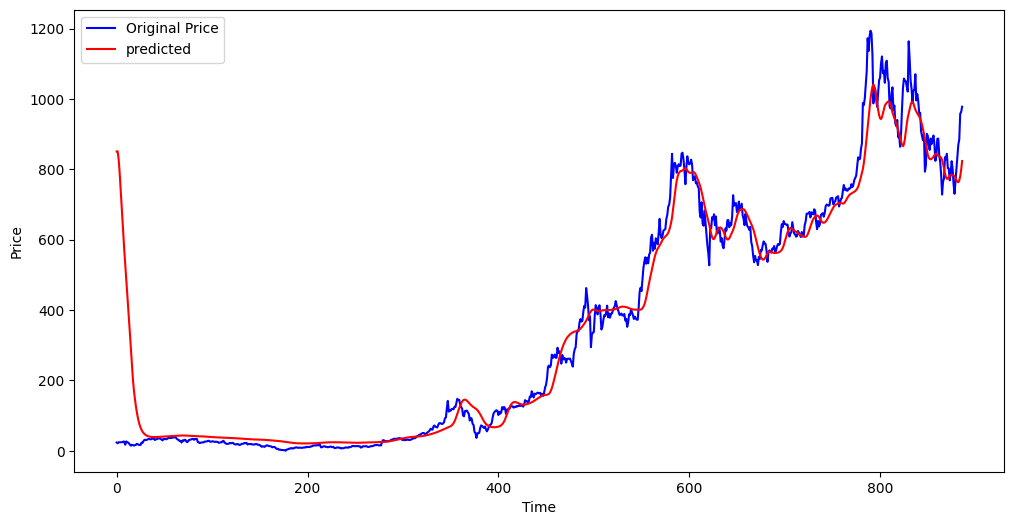

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r' , label = 'predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()